In [24]:
import requests
#  download de um arquivo zip contendo um conjunto de dados de imagens de gatos e cachorros
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
response = requests.get(url)

with open('cats_and_dogs_filtered.zip', 'wb') as f:
    f.write(response.content)

In [25]:
import zipfile

with zipfile.ZipFile('cats_and_dogs_filtered.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [26]:
import os

if os.path.exists("cats_and_dogs_filtered.zip"):
    os.remove("cats_and_dogs_filtered.zip")
else:
    print("O arquivo não existe")

In [27]:
import os
import matplotlib
matplotlib.use('notebook')
import matplotlib.pyplot as plt
import tensorflow as tf

In [28]:
# Importa o módulo os que permite a interação com o sistema operacional
import os

# Define o diretório do conjunto de dados como sendo o diretório atual de trabalho, com a pasta 'cats_and_dogs_filtered' anexada
dataset_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

# Define o diretório de treinamento como sendo o diretório do conjunto de dados, com a pasta 'train' anexada
dataset_train_dir = os.path.join(dataset_dir, 'train')

# Conta o número de arquivos na pasta 'cats' do diretório de treinamento
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))

# Conta o número de arquivos na pasta 'dogs' do diretório de treinamento
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

# Define o diretório de validação como sendo o diretório do conjunto de dados, com a pasta 'validation' anexada
dataset_validation_dir = os.path.join(dataset_dir, 'validation')

# Conta o número de arquivos na pasta 'cats' do diretório de validação
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cats')))

# Conta o número de arquivos na pasta 'dogs' do diretório de validação
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))

# Imprime o número de imagens de gatos no conjunto de treinamento
print('Train Cats: %s' % dataset_train_cats_len)

# Imprime o número de imagens de cachorros no conjunto de treinamento
print('Train Dogs: %s' % dataset_train_dogs_len)

# Imprime o número de imagens de gatos no conjunto de validação
print('Validation Cats: %s' % dataset_validation_cats_len)

# Imprime o número de imagens de cachorros no conjunto de validação
print('Validation Dogs: %s' % dataset_validation_dogs_len)

Train Cats: 1000
Train Dogs: 1000
Validation Cats: 500
Validation Dogs: 500


In [29]:
# Define a largura da imagem como 160 pixels
image_width = 160

# Define a altura da imagem como 160 pixels
image_height = 160

# Define o número de canais de cor na imagem como 3 (vermelho, verde, azul)
image_color_channel = 3

# Define o tamanho do canal de cor como 255 (valor máximo para um byte)
image_color_channel_size = 255

# Define o tamanho da imagem como uma tupla (largura, altura)
image_size = (image_width, image_height)

# Define a forma da imagem como uma tupla (largura, altura, canais de cor)
image_shape = image_size + (image_color_channel,)

# Define o tamanho do lote para o treinamento do modelo como 32
batch_size = 32

# Define o número de épocas para o treinamento do modelo como 20
epochs = 20

# Define a taxa de aprendizado para o treinamento do modelo como 0.0001
learning_rate = 0.0001

# Define os nomes das classes para a classificação como 'cat' e 'dog'
class_names = ['cat', 'dog']

In [30]:
# Importa a biblioteca TensorFlow
import tensorflow as tf

# Carrega o conjunto de dados de treinamento a partir do diretório especificado, redimensionando as imagens para o tamanho especificado,
# definindo o tamanho do lote e embaralhando os dados
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

# Carrega o conjunto de dados de validação a partir do diretório especificado, redimensionando as imagens para o tamanho especificado,
# definindo o tamanho do lote e embaralhando os dados
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = (image_width, image_height),
    batch_size = batch_size,
    shuffle = True
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [31]:
# Importa a biblioteca TensorFlow
import tensorflow as tf

# Define o valor de autotune, que permite ao TensorFlow determinar automaticamente o tamanho do buffer de pré-busca
autotune = tf.data.AUTOTUNE

# Aplica a pré-busca aos dados de treinamento, permitindo que os dados sejam carregados em segundo plano enquanto o modelo está sendo treinado
dataset_train = dataset_train.prefetch(buffer_size = autotune)

# Aplica a pré-busca aos dados de validação, permitindo que os dados sejam carregados em segundo plano enquanto o modelo está sendo treinado
dataset_validation = dataset_validation.prefetch(buffer_size = autotune)

# Aplica a pré-busca aos dados de teste, permitindo que os dados sejam carregados em segundo plano enquanto o modelo está sendo treinado
dataset_test = dataset_validation.prefetch(buffer_size = autotune)

In [32]:
# Importa a biblioteca matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline
# Define a função plot_dataset que recebe um conjunto de dados como argumento
def plot_dataset(dataset):

    # Limpa a figura atual
    plt.gcf().clear()

    # Cria uma nova figura com um tamanho específico
    plt.figure(figsize = (15, 15))

    # Itera sobre o primeiro lote de imagens e rótulos do conjunto de dados
    for features, labels in dataset.take(1):

        # Itera sobre os primeiros 9 elementos do lote
        for i in range(9):

            # Cria um subplot para cada imagem
            plt.subplot(3, 3, i + 1)

            # Desativa os eixos
            plt.axis('off')

            # Exibe a imagem i
            plt.imshow(features[i].numpy().astype('uint8'))

            # Define o título do subplot como o rótulo da imagem i
            plt.title(class_names[labels[i]])

<Figure size 640x480 with 0 Axes>

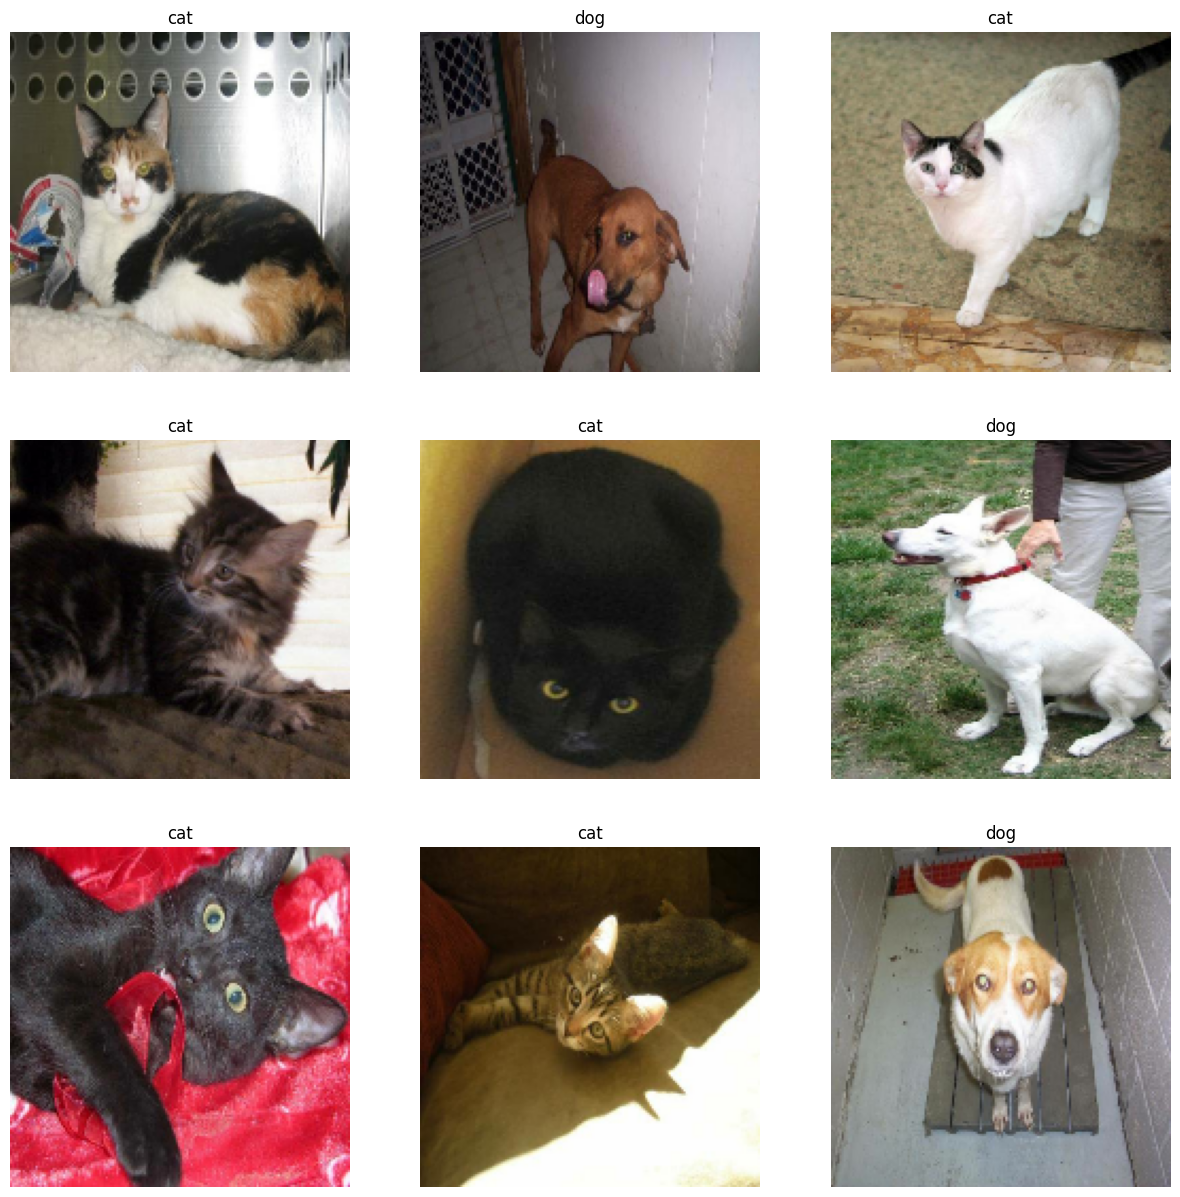

In [33]:
plot_dataset(dataset_train)

<Figure size 640x480 with 0 Axes>

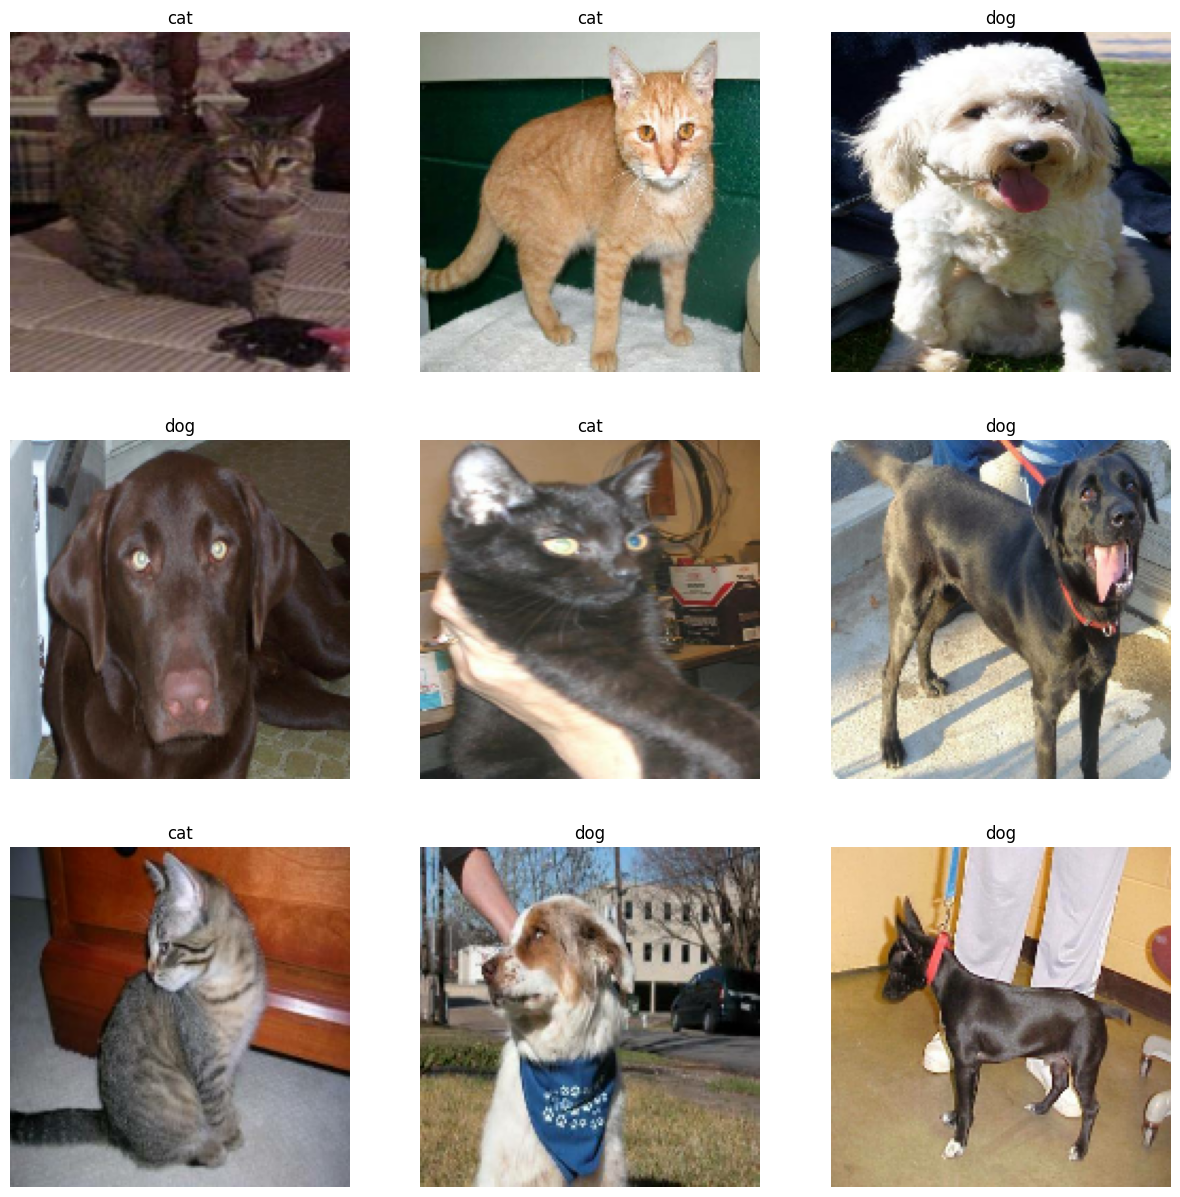

In [34]:
plot_dataset(dataset_validation)

<Figure size 640x480 with 0 Axes>

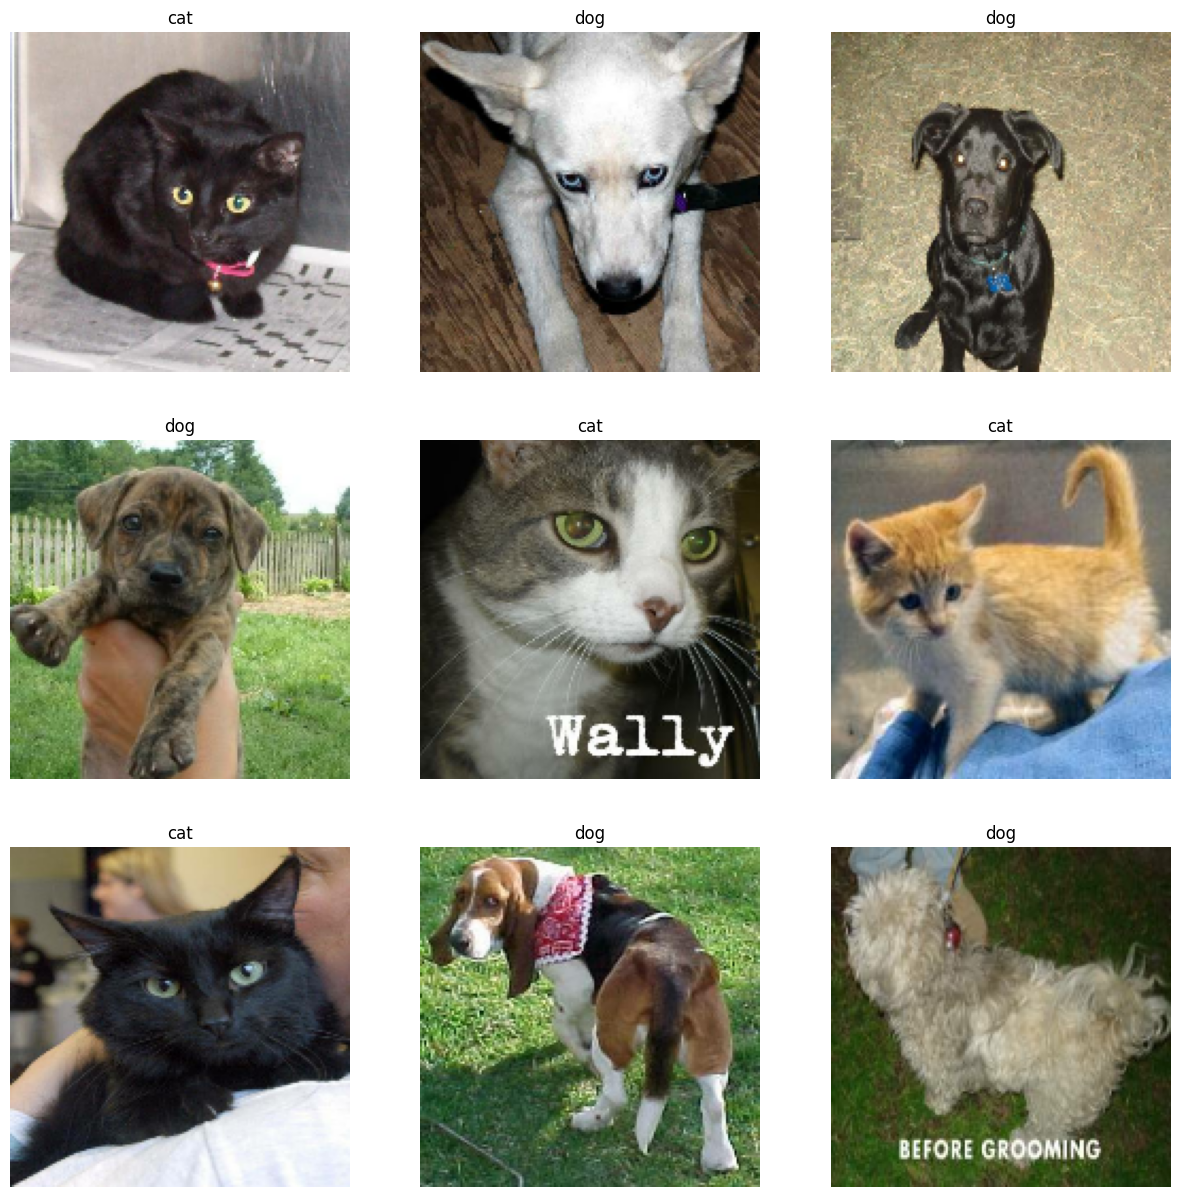

In [35]:
plot_dataset(dataset_test)

In [36]:
# Cria um modelo sequencial. Este é um tipo de modelo que é apropriado para uma pilha simples de camadas
# onde cada camada tem exatamente um tensor de entrada e um tensor de saída.
data_augmentation = tf.keras.models.Sequential([

    # Adiciona uma camada que aplica um flip aleatório ao longo do eixo horizontal em cada imagem.
    # Isso é útil para introduzir simetria horizontal nas imagens de treinamento para melhorar o desempenho do modelo.
    tf.keras.layers.RandomFlip('horizontal'),

    # Adiciona uma camada que aplica uma rotação aleatória em cada imagem. O valor 0.2 significa que a rotação
    # será no intervalo [-20% * 2pi, 20% * 2pi]. Isso é útil para introduzir invariância de rotação nas imagens de treinamento.
    tf.keras.layers.RandomRotation(0.2),

    # Adiciona uma camada que aplica um zoom aleatório em cada imagem. O valor 0.2 significa que o zoom
    # será no intervalo [1 - 0.2, 1 + 0.2]. Isso é útil para introduzir invariância de escala nas imagens de treinamento.
    tf.keras.layers.RandomZoom(0.2)
])

In [37]:
def plot_dataset_data_augmentation(dataset):
    # Limpa a figura atual
    plt.gcf().clear()
    # Define o tamanho da nova figura
    plt.figure(figsize = (15, 15))

    # Para cada conjunto de características e rótulos no dataset
    for features, _ in dataset.take(1):

        # Seleciona a primeira característica
        feature = features[0]

        # Para cada número de 0 a 8
        for i in range(9):

            # Aplica a função de aumento de dados na característica e expande suas dimensões
            feature_data_augmentation = data_augmentation(tf.expand_dims(feature, 0))

            # Define a posição do subplot na grade 3x3
            plt.subplot(3, 3, i + 1)
            # Desativa os eixos
            plt.axis('off')

            # Exibe a imagem com a cor normalizada pelo tamanho do canal de cor
            plt.imshow(feature_data_augmentation[0] / image_color_channel_size)

<Figure size 640x480 with 0 Axes>

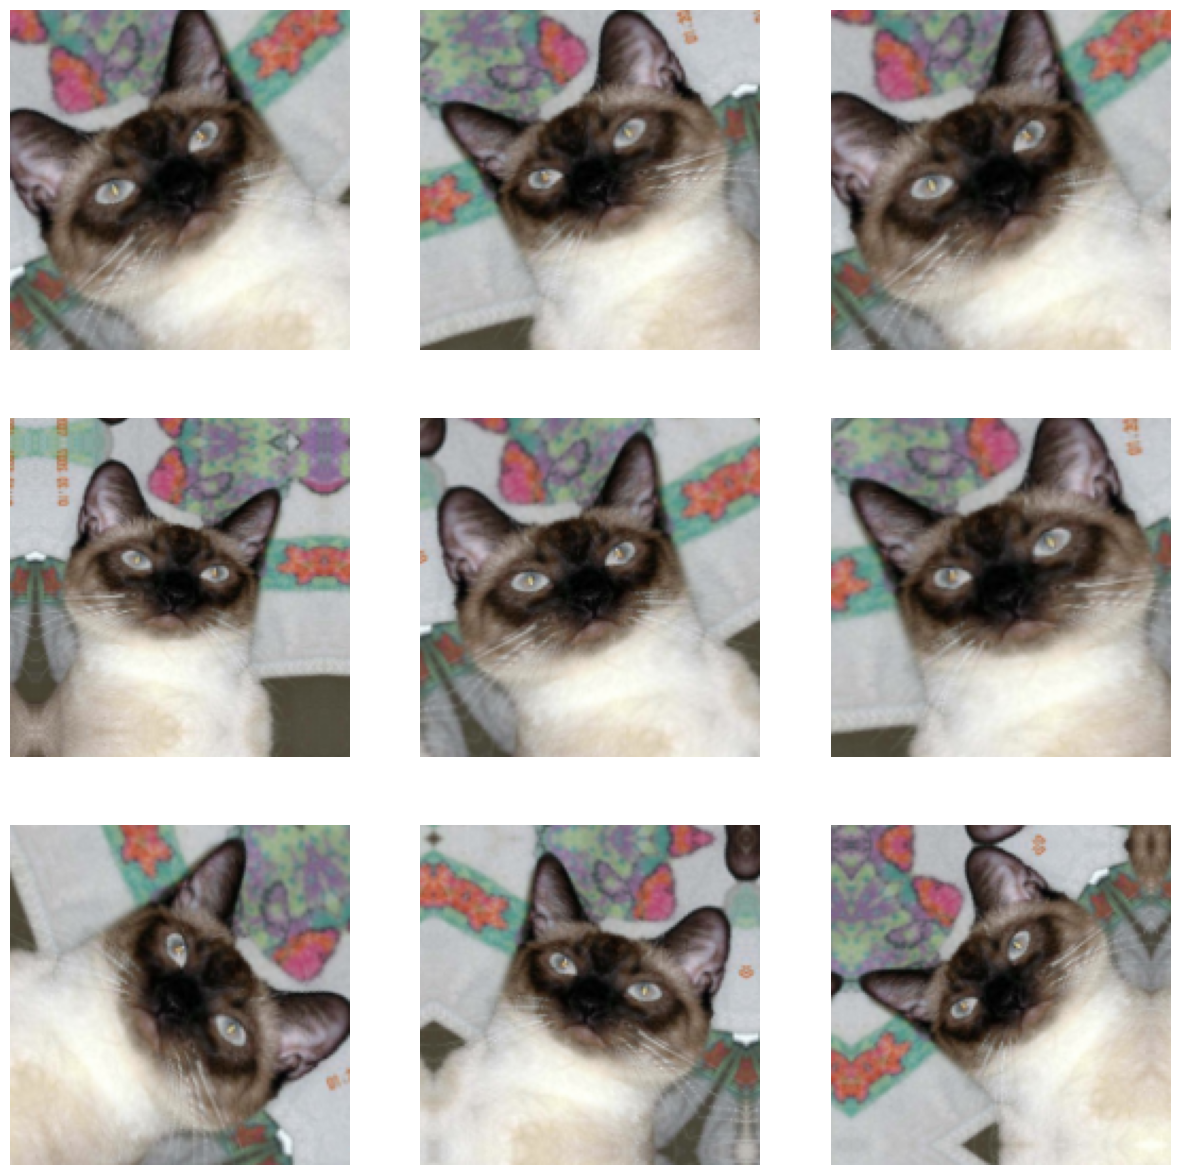

In [38]:
plot_dataset_data_augmentation(dataset_train)

In [39]:
# A camada de redimensionamento é usada para normalizar os valores dos pixels da imagem.
# A normalização é feita dividindo cada pixel pelo valor médio do canal de cor da imagem (image_color_channel_size / 2) e subtraindo 1.
# Isso é feito para trazer todos os valores de pixel para o intervalo [-1, 1].
# O parâmetro input_shape define o formato da entrada que a camada deve esperar.
rescaling = tf.keras.layers.Rescaling(1. / (image_color_channel_size / 2.), offset = -1, input_shape = image_shape)

In [40]:
# Cria um modelo de aprendizado de transferência usando a arquitetura MobileNetV2 pré-treinada no dataset ImageNet.
# O parâmetro input_shape define o formato da entrada que o modelo deve esperar.
# O parâmetro include_top é definido como False para excluir a camada de classificação no topo da rede, permitindo que possamos adicionar nossas próprias camadas de classificação.
# O parâmetro weights é definido como 'imagenet' para carregar os pesos treinados no dataset ImageNet.
model_transfer_learning = tf.keras.applications.MobileNetV2(input_shape = image_shape, include_top = False, weights = 'imagenet')

# Define o modelo como não treinável, o que significa que os pesos da rede pré-treinada não serão atualizados durante o treinamento.
model_transfer_learning.trainable = False

In [41]:
# Cria um callback de parada antecipada que interrompe o treinamento quando a 'loss' (perda) para de melhorar.
# O parâmetro 'monitor' define a métrica a ser monitorada, neste caso, a 'loss'.
# O parâmetro 'patience' define o número de épocas para aguardar antes de parar o treinamento quando a métrica parar de melhorar.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

In [42]:
# Cria um modelo sequencial, que é uma pilha linear de camadas.
# A camada de redimensionamento normaliza os valores dos pixels da imagem.
# A camada de aumento de dados aplica transformações aleatórias nas imagens para aumentar a diversidade do conjunto de dados.
# O modelo de aprendizado de transferência é a arquitetura MobileNetV2 pré-treinada no dataset ImageNet.
# A camada GlobalAveragePooling2D transforma os mapas de características 2D produzidos pelo modelo de aprendizado de transferência em vetores 1D.
# A camada Dropout descarta aleatoriamente uma fração das entradas (neste caso, 20%) para ajudar a prevenir o overfitting.
# A camada Dense é a camada de saída do modelo, que produz a probabilidade de a imagem ser de uma determinada classe usando a função de ativação sigmoid.

model = tf.keras.models.Sequential([
    rescaling,
    data_augmentation,
    model_transfer_learning,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compila o modelo com o otimizador Adam, a perda de entropia cruzada binária e a métrica de acurácia.
# O otimizador Adam é um método de otimização estocástica que é adequado para problemas de aprendizado de máquina de grande escala.
# A perda de entropia cruzada binária é uma função de perda adequada para problemas de classificação binária.
# A acurácia é a fração de imagens que são corretamente classificadas pelo modelo.

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [43]:
# Inicia o treinamento do modelo.
# O parâmetro dataset_train é o conjunto de dados de treinamento.
# O parâmetro validation_data é o conjunto de dados de validação.
# O parâmetro epochs define o número de vezes que o algoritmo de aprendizado passará por todo o conjunto de dados de treinamento.
# O parâmetro callbacks é uma lista de callbacks a serem aplicados durante o treinamento. Neste caso, estamos usando o callback de parada antecipada, que interromperá o treinamento quando a 'loss' (perda) parar de melhorar.

history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs,
    callbacks = [
        early_stopping
    ]
)

model.save('model.keras')

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - accuracy: 0.6070 - loss: 0.7122 - val_accuracy: 0.8030 - val_loss: 0.4907
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.7470 - loss: 0.5340 - val_accuracy: 0.8990 - val_loss: 0.3579
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.8260 - loss: 0.4202 - val_accuracy: 0.9400 - val_loss: 0.2806
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - accuracy: 0.8445 - loss: 0.3787 - val_accuracy: 0.9550 - val_loss: 0.2312
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.8625 - loss: 0.3376 - val_accuracy: 0.9580 - val_loss: 0.1992
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.8995 - loss: 0.2864 - val_accuracy: 0.9620 - val_loss: 0.1755
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.8985 - loss: 0.2852 - val_accuracy: 0.9650 - val_loss: 0.1591
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.8945 - loss: 0.2669 - val_accu

In [44]:
def plot_model():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize = (15, 8))

    plt.subplot(1, 2, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('Training and Validation Loss')
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend(loc = 'lower right')

    plt.show()

In [45]:
# Define a função plot_model que é usada para visualizar a acurácia e a perda do modelo durante o treinamento.
def plot_model():

    # Recupera a acurácia do treinamento e da validação do histórico do modelo.
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Recupera a perda do treinamento e da validação do histórico do modelo.
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Cria um intervalo para as épocas.
    epochs_range = range(epochs)

    # Limpa a figura atual.
    plt.gcf().clear()
    # Define o tamanho da nova figura.
    plt.figure(figsize = (15, 8))

    # Cria o primeiro subplot para a acurácia do treinamento e da validação.
    plt.subplot(1, 2, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')

    # Cria o segundo subplot para a perda do treinamento e da validação.
    plt.subplot(1, 2, 2)
    plt.title('Training and Validation Loss')
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend(loc = 'lower right')

    # Exibe as figuras.
    plt.show()

In [46]:
# Avalia o desempenho do modelo no conjunto de dados de teste.
# A função evaluate retorna a perda e as métricas calculadas para o modelo.
dataset_test_loss, dataset_test_accuracy = model.evaluate(dataset_test)

# Imprime a perda e a acurácia do conjunto de dados de teste.
print('Dataset Test Loss:     %s' % dataset_test_loss)
print('Dataset Test Accuracy: %s' % dataset_test_accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.9780 - loss: 0.0848
Dataset Test Loss:     0.08479677140712738
Dataset Test Accuracy: 0.9779999852180481


In [47]:
def plot_dataset_predictions(dataset):

    features, labels = dataset_test.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('Labels:      %s' % labels)
    print('Predictions: %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for i in range(9):

        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

Labels:      [1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1]
Predictions: [1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1]


<Figure size 640x480 with 0 Axes>

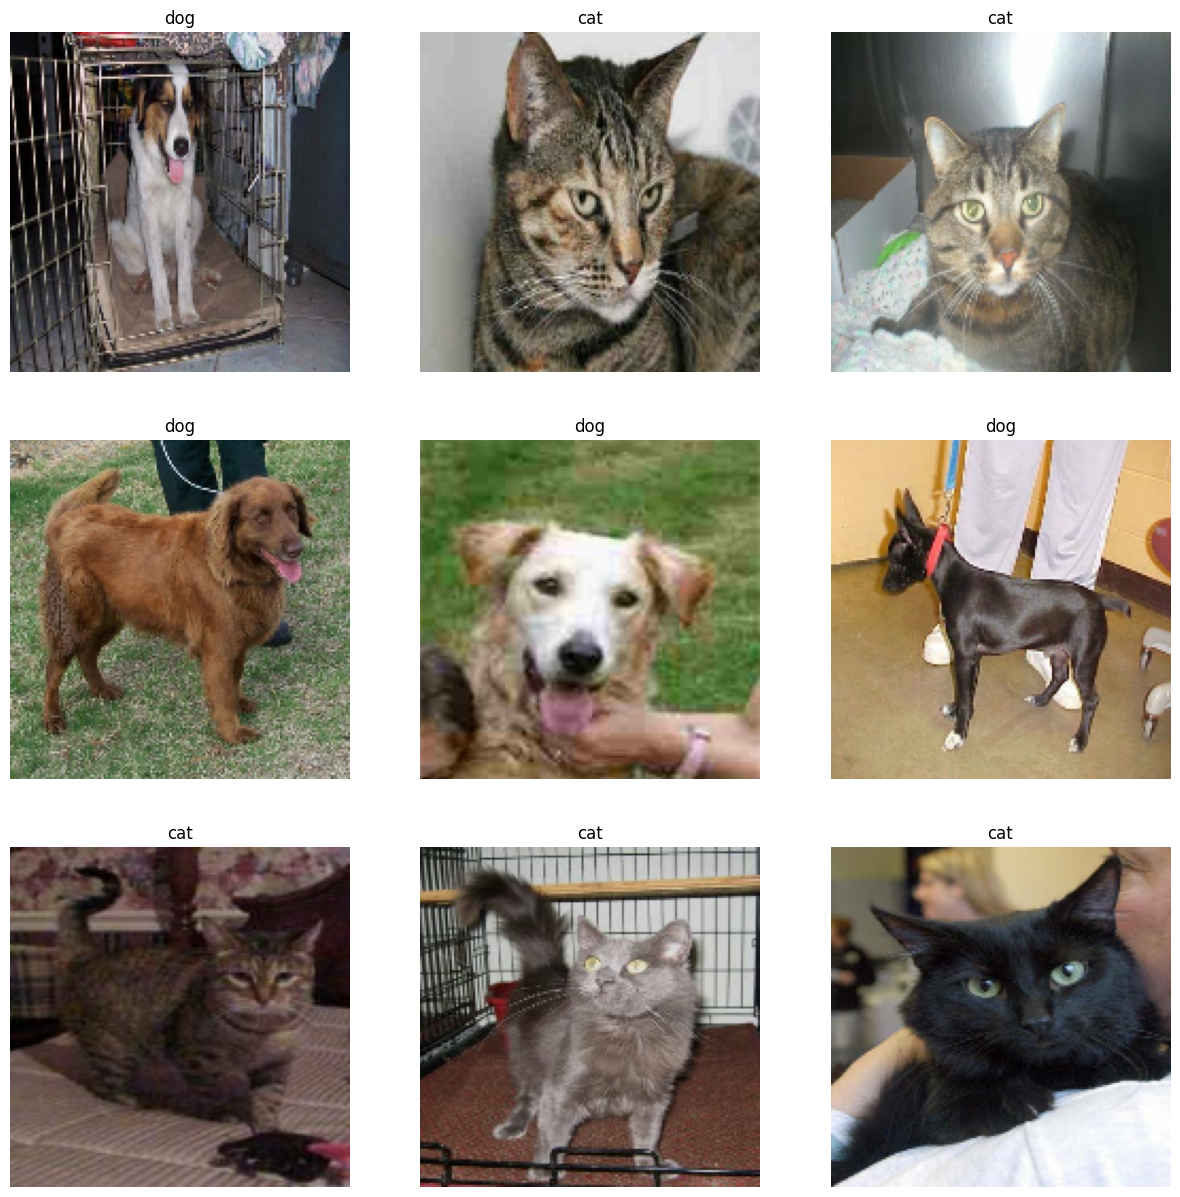

In [48]:
plot_dataset_predictions(dataset_test)

In [49]:
import keras


model = keras.models.load_model('model.keras')

In [50]:
def predict(image_file):

    image = tf.keras.preprocessing.image.load_img(image_file, target_size = image_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.expand_dims(image, 0)

    prediction = model.predict(image)[0][0]

    print('Prediction: {0} | {1}'.format(prediction, ('cat' if prediction < 0.5 else 'dog')))

In [51]:
def predict_url(image_fname, image_origin):

    image_file = tf.keras.utils.get_file(image_fname, origin = image_origin)
    return predict(image_file)

In [56]:
import os
import tensorflow as tf

# Exemplo 1: inferir imagem local (se existir)
local_img = 'imaged.jpg'
if os.path.exists(local_img):
    print('Usando imagem local:', local_img)
    predict(local_img)
else:
    print(f"Imagem local '{local_img}' não encontrada. Faça upload ou use predict_url()")

# Exemplo 2: inferir a partir de uma URL
# Substitua pela URL de imagem que quiser; esta é apenas um exemplo público
url = 'https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg'  # exemplo: cachorro
fname = 'from_url.jpg'
try:
    print('Baixando e inferindo da URL...')
    predict_url(fname, url)
except Exception as e:
    print('Erro ao baixar/inferir da URL:', e)
    # tentativa alternativa: baixar para um caminho e chamar predict()
    try:
        path = tf.keras.utils.get_file(fname, origin = url)
        predict(path)
    except Exception as e2:
        print('Falha no download alternativo:', e2)

# Observação: a função predict() já está definida acima e imprime a previsão.
# Se preferir, refatore predict() para retornar valores em vez de apenas imprimir.

Usando imagem local: imaged.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: 0.8390632271766663 | dog
Baixando e inferindo da URL...
Prediction: 0.8390632271766663 | dog
Baixando e inferindo da URL...
Erro ao baixar/inferir da URL: URL fetch failure on https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg: 403 -- Forbidden
Erro ao baixar/inferir da URL: URL fetch failure on https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg: 403 -- Forbidden
Falha no download alternativo: URL fetch failure on https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg: 403 -- Forbidden
Falha no download alternativo: URL fetch failure on https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg: 403 -- Forbidden
